In [ ]:
#import packages we need
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#import data I'm using
vivino_data = pd.read_csv('vivino_data.csv')
full_wine = pd.read_csv('full_wine.csv')


In [ ]:
#merge data i'm using
inner_wine= full_wine.merge(vivino_data, left_on = 'productId_ArtId', right_on = 'productId', how='inner' )

In [148]:
#remove empty values
inner_wine= inner_wine[inner_wine['vivino_average_rating'].isna() == False]


In [149]:
#make a csv
inner_wine.to_csv('inner_wine.csv', encoding= 'utf-8', index= False, sep= ',' )

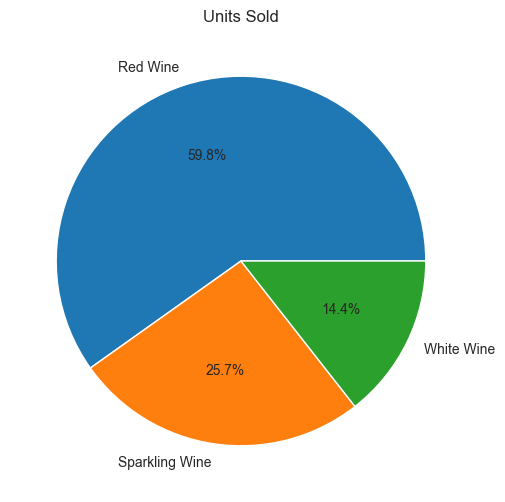

In [150]:

more_pie_data=inner_wine.groupby('Product_Group_Details')['Units_sold'].sum()

categories = list(more_pie_data.keys())

data_pie = list(more_pie_data.values)


sns.set_style("whitegrid") 
plt.figure(figsize=(6, 6)) 
plt.pie(data_pie, labels=categories, autopct='%1.1f%%')
plt.title('Units Sold')
plt.show() 


In [151]:
inner_wine_white=inner_wine[inner_wine['Product_Group_Details'] == 'White Wine']
inner_wine_red = inner_wine[inner_wine['Product_Group_Details'] == 'Red Wine']
inner_wine_sparkling = inner_wine [inner_wine['Product_Group_Details'] == 'Sparkling Wine']

<Axes: >

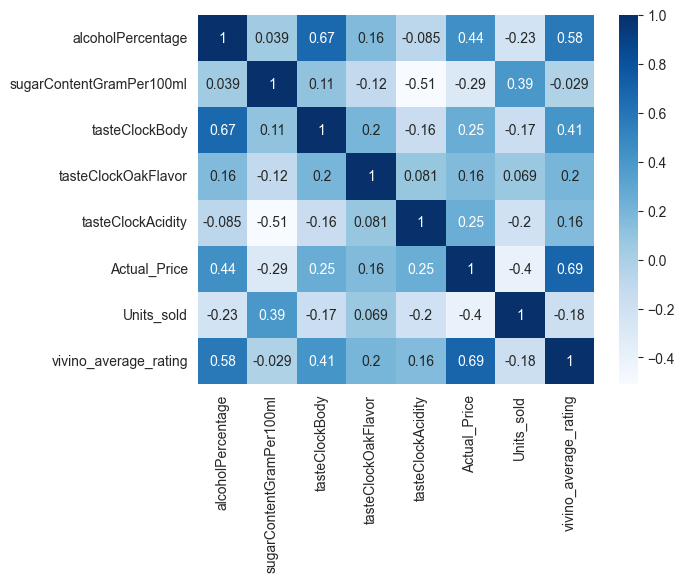

In [157]:


sns.heatmap(inner_wine_red.iloc[:][['alcoholPercentage', 
       'sugarContentGramPer100ml', 'tasteClockBody', 
       'tasteClockOakFlavor',
       'tasteClockAcidity', 
        'Actual_Price',  'Units_sold','vivino_average_rating']].corr(),cmap="Blues",annot=True)




# Look at prices

In [ ]:
#calculate the price in USD for 2023
inner_wine['Actual_Price_in_USD'] = inner_wine['Actual_Price']/10.61284

#calculate continents

def continent(x):
    if x in ['Argentina','Chile']:
            return 'South America'
    elif x in ['Australia' , 'New Zealand']:
             return 'Oceania'
    elif x == 'USA':
            return 'North America'
    elif x == 'South Africa':
            return 'Africa'
    else: 
            return 'Europe'
    
inner_wine['Continent']= inner_wine['Country'].apply(continent)

inner_wine['Continent'].unique()

array(['North America', 'Europe', 'South America', 'Oceania', 'Africa'],
      dtype=object)

Text(0.5, 1.0, 'Systembolaget Prices vs Vivino')

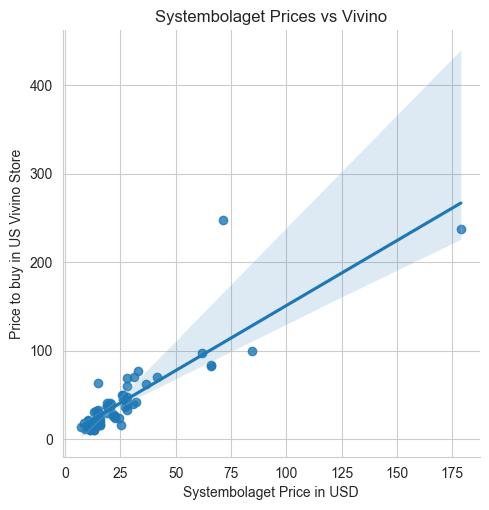

In [ ]:
sns.lmplot(data= inner_wine, x= 'Actual_Price_in_USD', y = 'vivino_price')
plt.xlabel('Systembolaget Price in USD')  
plt.ylabel('Price to buy in US Vivino Store')  


plt.title('Systembolaget Prices vs Vivino')

Text(0.5, 1.0, 'Systembolaget Prices vs Vivino')

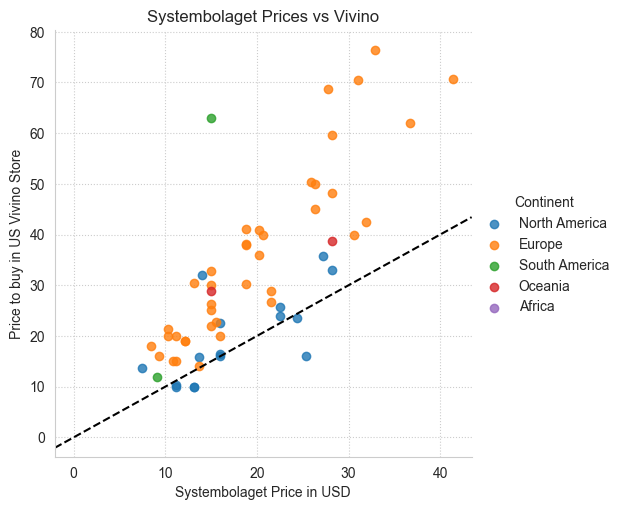

In [ ]:
#show lower prices

low_prices=inner_wine[inner_wine['Actual_Price_in_USD']<50]

g=sns.lmplot(data= low_prices, x= 'Actual_Price_in_USD', y = 'vivino_price', hue= 'Continent', fit_reg=False)
plt.xlabel('Systembolaget Price in USD')  
plt.ylabel('Price to buy in US Vivino Store') 
g.ax.grid(True, axis='both', ls=':')
g.ax.axline((0, 0), slope=1, color='k', ls='--') 


plt.title('Systembolaget Prices vs Vivino')

In [ ]:
inner_wine.sort_values('Actual_Price')
inner_wine.columns

interesting_columns = [
       'Name', 'Actual_Price_in_USD','vivino_price']
inner_wine[interesting_columns].tail()

,Name,Actual_Price_in_USD,vivino_price
125,Borgogno Barolo Riserva,65.863614,82.16
126,Château La Grave à Pomerol Trigant de Boisset,65.863614,84.17
127,Amarone della Valpolicella Classico Campo del ...,71.328692,247.91
128,Chassagne-Montrachet Joseph Drouhin,84.708711,99.97
129,Bollinger La Grande Année Brut,178.934197,237.00
